In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
!pip install py7zr
import py7zr
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import SGD,Adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train = pd.read_json('/content/drive/MyDrive/inputs/train.json')
test = pd.read_json('/content/drive/MyDrive/inputs/test.json')

In [ ]:
test.head()

,id,band_1,band_2,inc_angle
0,5941774d,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",34.966400
1,4023181e,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",32.615072
2,b20200e4,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",37.505433
3,e7f018bb,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",34.473900
4,4371c8c3,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",43.918874


In [ ]:
train.head()

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [ ]:
train.inc_angle = train.inc_angle.replace('na', 0)
train.inc_angle = train.inc_angle.astype(float).fillna(0.0)

In [ ]:
import numpy as np
def get_scaled_imgs(df):
    imgs = []
    label =[]

    for i, row in df.iterrows():
        #make 75x75 image
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 + band_2 # plus since log(x*y) = log(x) + log(y)

        # Rescale
        a = (band_1 - band_1.mean()) / (band_1.max() - band_1.min())
        b = (band_2 - band_2.mean()) / (band_2.max() - band_2.min())
        c = (band_3 - band_3.mean()) / (band_3.max() - band_3.min())
        imgs.append(np.dstack((a, b, c)))
    return np.array(imgs)

In [ ]:
data=get_scaled_imgs(train)
target = np.array(train['is_iceberg'])

In [ ]:
data[0]

NameError: ignored

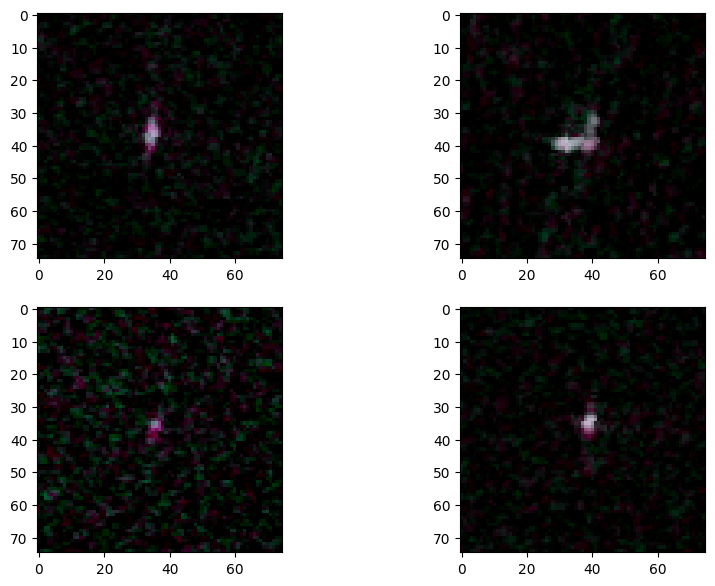

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

for i in range(4):
#  Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(data[i])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1283, 75, 75, 3)
(1283,)
(321, 75, 75, 3)
(321,)


In [ ]:
# from tensorflow.keras import layers

In [ ]:
# data_augmentation = keras.Sequential(
#   [
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
#     layers.experimental.preprocessing.RandomContrast(0.5),
#   ]
# )

In [ ]:
# plt.imshow(data[108])

In [ ]:
# plt.imshow(data_augmentation(data)[108])

In [ ]:
model=Sequential()

    # CNN 1
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.5))

    # CNN 2 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

    # CNN 3
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

    # CNN 4
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

    # You must flatten the data for the dense layers
model.add(Flatten())

    # Dense 1
model.add(Dense(512, activation='relu',input_shape=(257,)))
model.add(Dropout(0.2))

    # Dense 2
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

    # Output
model.add(Dense(1, activation="sigmoid"))

# Final model
optimizer = Adam(lr=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 73, 73, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 36, 36, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 17, 17, 128)      0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 17, 17, 128)      

In [ ]:
# model = Sequential([
#   data_augmentation,
#   layers.Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)),
#   layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
#   layers.Dropout(0.5),
#   layers.Conv2D(128, kernel_size=(3, 3), activation='relu' ),
#   layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#   layers.Dropout(0.2),
#   layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
#   layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#   layers.Dropout(0.5),
#   layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#   layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(512, activation='relu',input_shape=(257,)),
#   layers.Dropout(0.5),
#   layers.Dense(256, activation='relu'),
#   layers.Dropout(0.2),
#   layers.Dense(1, activation="sigmoid"),
# ])

In [ ]:
import keras
file_path = "weights_best.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(file_path, monitor="val_accuracy", save_best_only=True, mode='max')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.9, patience=2, min_lr=1e-6, mode="max", verbose=True)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, mode="max", verbose=True)
callbacks_list = [checkpoint, reduce_lr, early_stopping]

In [ ]:
history=model.fit(x_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.2,callbacks=callbacks_list)

Epoch 1/100
103/103 [==============================] - 34s 311ms/step - loss: 0.6709 - accuracy: 0.5604 - val_loss: 0.5897 - val_accuracy: 0.6693 - lr: 0.0010
Epoch 2/100
103/103 [==============================] - 30s 294ms/step - loss: 0.5228 - accuracy: 0.7183 - val_loss: 0.5295 - val_accuracy: 0.7160 - lr: 0.0010
Epoch 3/100
103/103 [==============================] - 32s 309ms/step - loss: 0.4704 - accuracy: 0.7729 - val_loss: 0.4996 - val_accuracy: 0.7471 - lr: 0.0010
Epoch 4/100
103/103 [==============================] - 31s 297ms/step - loss: 0.4214 - accuracy: 0.8002 - val_loss: 0.4824 - val_accuracy: 0.7432 - lr: 0.0010
Epoch 5/100
103/103 [==============================] - 33s 324ms/step - loss: 0.3936 - accuracy: 0.8197 - val_loss: 0.3832 - val_accuracy: 0.8171 - lr: 0.0010
Epoch 6/100
103/103 [==============================] - 30s 290ms/step - loss: 0.3577 - accuracy: 0.8363 - val_loss: 0.3441 - val_accuracy: 0.8210 - lr: 0.0010
Epoch 7/100
103/103 [=========================

df_his=pd.DataFrame.from_dict(history.history)
history.params
history.history.keys()

In [ ]:
df_his=pd.DataFrame.from_dict(history.history)
history.params
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

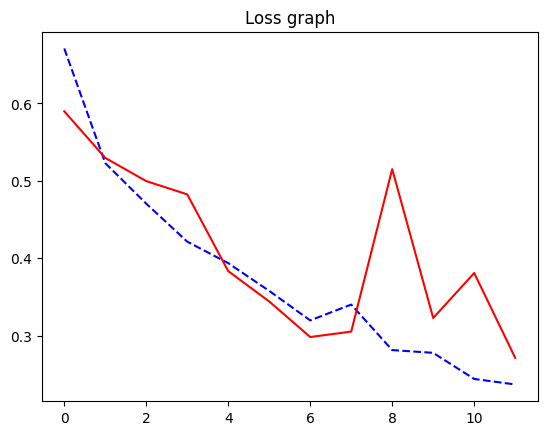

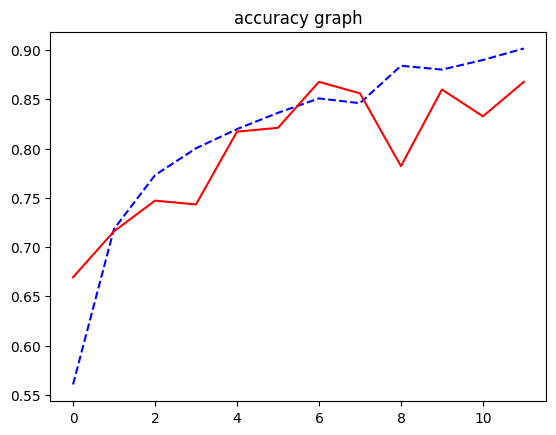

In [ ]:
df_his['loss'].plot(style='b--',label='trainig')
df_his['val_loss'].plot(style='r-',label='test')
plt.title("Loss graph")
plt.show()

df_his['accuracy'].plot(style='b--',label='trainig')
df_his['val_accuracy'].plot(style='r-',label='test')
plt.title("accuracy graph")
plt.show()

In [ ]:
file_path = "./weights_best.hdf5"
model = keras.models.load_model(file_path)

In [ ]:
score=model.evaluate(x_train,y_train,verbose=0)
print("Test Loss:",score[0])
print("accuracy:",score[1])

Test Loss: 0.2490750551223755
accuracy: 0.9033515453338623


In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("accuracy:",score[1])

Test Loss: 0.25585025548934937
accuracy: 0.8753893971443176


In [ ]:
predicted=model.predict(x_test)


11/11 [==============================] - 2s 183ms/step


In [ ]:
test_data=get_scaled_imgs(test)

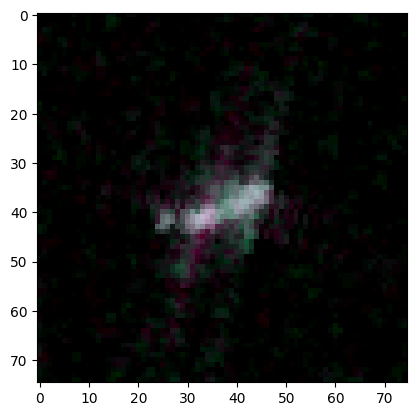

In [ ]:
test_data.shape
plt.imshow(test_data[0])


In [ ]:
predicted=model.predict(test_data)
print(predicted[:10])
print(predicted.shape)

264/264 [==============================] - 61s 230ms/step
[[4.5842338e-02]
 [8.8432962e-01]
 [9.6647395e-04]
 [9.9728924e-01]
 [2.7671275e-01]
 [8.9140408e-02]
 [4.1247737e-03]
 [9.9472982e-01]
 [4.3296037e-05]
 [1.2743298e-04]]
(8424, 1)


In [ ]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['is_iceberg'] = predicted.reshape((predicted.shape[0]))
submission.to_csv('/content/drive/MyDrive/inputs/sample_submission.csv', index=False)


In [ ]:
submission.head(10)


,id,is_iceberg
0,5941774d,0.045842
1,4023181e,0.884330
2,b20200e4,0.000966
3,e7f018bb,0.997289
4,4371c8c3,0.276713
5,a8d9b1fd,0.089140
6,29e7727e,0.004125
7,92a51ffb,0.994730
8,c769ac97,0.000043
9,aee0547d,0.000127
